# Assignment 2. Semi-open, Classification

## Frame the Problem


Predict which passengers on the titanic survived based on their age, gender number of siblings, etc.

The goal is to predict which passengers survived the Titanic shipwreck.

### Importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sb

## Importing the Data

In [2]:
data = pd.read_csv('Titanic_Data.csv')

In [3]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,Number of Siblings/Spouses Aboard,Number of Parents/Children Aboard,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,No
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Yes
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Yes
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Yes
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,No


## Cleaning the Data

Drop the irrelevant features.

In [4]:
data.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [5]:
data.head()

,Pclass,Sex,Age,Number of Siblings/Spouses Aboard,Number of Parents/Children Aboard,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,No
1,1,female,38.0,1,0,71.2833,C,Yes
2,3,female,26.0,0,0,7.9250,S,Yes
3,1,female,35.0,1,0,53.1000,S,Yes
4,3,male,35.0,0,0,8.0500,S,No


### Converting the Categorical Data to Numerical Data

In the dataset,  there are 3 columns with the catergorical values that need to be converted to numerical values. These are:

* Sex
* Embarked
* Survived

We will also check that the dataset is complete and there is no null cells.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pclass                             891 non-null    int64  
 1   Sex                                891 non-null    object 
 2   Age                                714 non-null    float64
 3   Number of Siblings/Spouses Aboard  891 non-null    int64  
 4   Number of Parents/Children Aboard  891 non-null    int64  
 5   Fare                               891 non-null    float64
 6   Embarked                           889 non-null    object 
 7   Survived                           891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


Converting the values of the "purchased" column

In [7]:
# getting the unique values in the purchase column
data['Survived'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
# make the dictionary of the items in the "survived" column
survived = {"No": 0, "Yes": 1}
data["Survived"] = data["Survived"].map(survived)
data["Survived"].head()  # checking if the changes are applied

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Converting the values of the "sex" column

In [9]:
# getting the unique values in the sex column
data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [10]:
# make the dictionary of the items in the "sex" column
gender = {"male":0.0, "female":1.0}
data['Sex'] = data['Sex'].map(gender)
data['Sex'].head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Sex, dtype: float64

Converting the values of the "embarked" column

In [11]:
# getting the unique values in the embarked column
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
# make the dictionary of the items in the "embarked" column
ports = {'S':0.0, 'C':1.0, 'Q':2.0}
data['Embarked'] = data['Embarked'].map(ports)
data['Embarked'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Embarked, dtype: float64

Check the dataset to see if changes are applied.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pclass                             891 non-null    int64  
 1   Sex                                891 non-null    float64
 2   Age                                714 non-null    float64
 3   Number of Siblings/Spouses Aboard  891 non-null    int64  
 4   Number of Parents/Children Aboard  891 non-null    int64  
 5   Fare                               891 non-null    float64
 6   Embarked                           889 non-null    float64
 7   Survived                           891 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


### Encoding the Output Data (Labels)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Survived'] = le.fit_transform(data['Survived'])
data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Fill Missing Data Inputs

In [15]:
data['Age'].fillna(data['Age'].mean(), inplace = True)
data['Embarked'].fillna(data['Embarked'].mean(), inplace = True)


Make sure there is no more missing data.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pclass                             891 non-null    int64  
 1   Sex                                891 non-null    float64
 2   Age                                891 non-null    float64
 3   Number of Siblings/Spouses Aboard  891 non-null    int64  
 4   Number of Parents/Children Aboard  891 non-null    int64  
 5   Fare                               891 non-null    float64
 6   Embarked                           891 non-null    float64
 7   Survived                           891 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


### Cleaning the Data from the Outliers

We will trim the data from the outliers.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

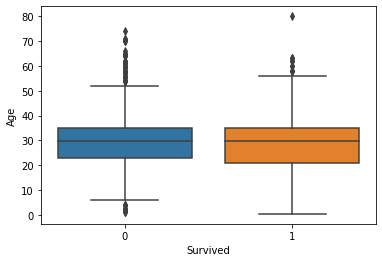

In [17]:
sb.boxplot(x='Survived', y='Age', data=data)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

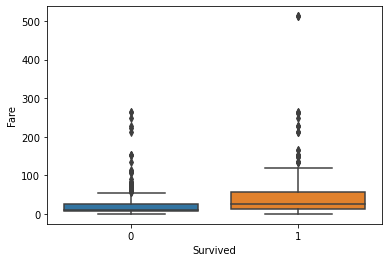

In [18]:
sb.boxplot(x='Survived', y='Fare', data=data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

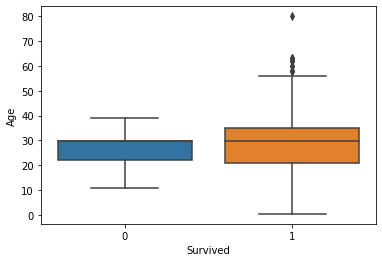

In [19]:
# trim the age
data = data[((data['Age']<40) & (data['Age']>10) & (data['Survived']==0)) | (data['Survived']==1)]
sb.boxplot(x='Survived', y='Age', data=data)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

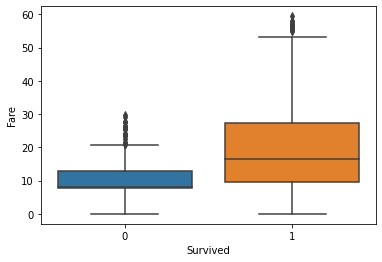

In [20]:
# trim the fares
data = data[((data['Fare']<30) & (data['Survived']==0)) | ((data['Fare']<60) & (data['Survived']==1))]
sb.boxplot(x='Survived', y='Fare', data=data)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pclass                             624 non-null    int64  
 1   Sex                                624 non-null    float64
 2   Age                                624 non-null    float64
 3   Number of Siblings/Spouses Aboard  624 non-null    int64  
 4   Number of Parents/Children Aboard  624 non-null    int64  
 5   Fare                               624 non-null    float64
 6   Embarked                           624 non-null    float64
 7   Survived                           624 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 43.9 KB


## Exploring the Data

Here, we will check the correlation between "Survived" column and the other colunms.

You can find more info about the heatmap function in Seaborn [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

Survived                             1.000000
Sex                                  0.522702
Fare                                 0.452490
Number of Parents/Children Aboard    0.244611
Number of Siblings/Spouses Aboard    0.153610
Embarked                             0.066275
Age                                 -0.014719
Pclass                              -0.368506
Name: Survived, dtype: float64

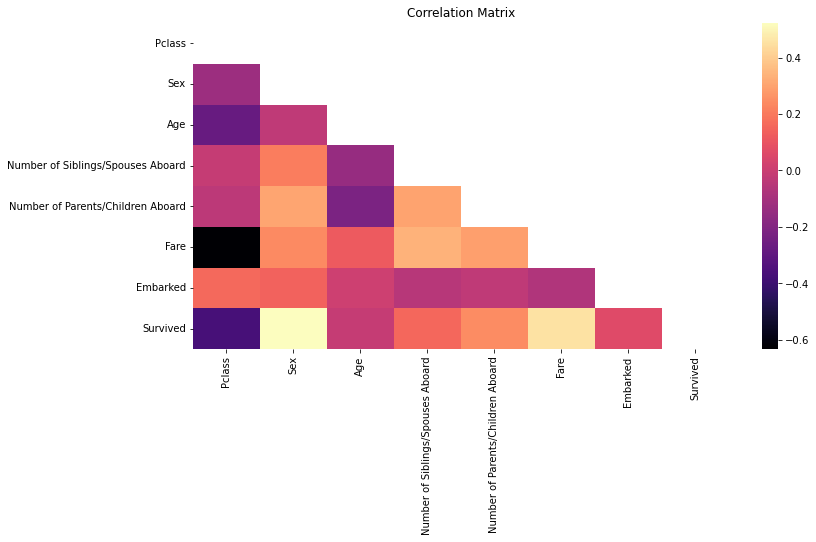

In [22]:
# creating the correlation matrix
corr_matrix = data.corr()

# visualizing the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  
plt.figure(figsize=(12, 6))  # to set the figure size
heatmap(corr_matrix, mask=mask, annot=False, lw=0, linecolor='white', cmap='magma', fmt='0.2f')
plt.title("Correlation Matrix")  # to add title 
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# getting the correlation values with the purchased column
## Start the code here
corr_matrix['Survived'].sort_values(ascending=False)
## End

### Splitting the Train and Test Data

In [23]:
## Code here
train_data, test_data = train_test_split(data, test_size=0.2)

# splitting the input and the output from the training set
Y_train = train_data[['Survived']].copy()

# removing the useless features and the output from the dataset
X_train = train_data.drop(['Survived', 'Embarked', 'Pclass'], axis=1) 

Let's check the type of the data 

In [24]:
print(type(X_train))
print(type(Y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### Data Visualization

In [25]:
# making a function to plot the data
def plot_scatter_with_labels(X1, X2, Y, xlabel='Age', ylabel='Fare'):
  df = pd.DataFrame(dict(x1=X1, x2=X2, label=Y))
  groups = df.groupby('label')
  for number, group in groups:
    if number == 0:
      name = 'Did not survived'
    elif number == 1:
      name = 'Survived'
    plt.plot(group.x1, group.x2, marker='o', linestyle='', ms=3, label=name)

  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)


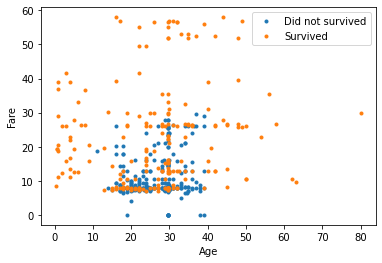

In [26]:
plot_scatter_with_labels(train_data['Age'], train_data['Fare'], train_data['Survived'])

### Scaling the features

We standardize all the data using their mean and standard deviation

$$ \hat{x_i} = \frac{x_i-\mu}{\sigma_i}$$

In [27]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [28]:
X_train.head()

,Sex,Age,Number of Siblings/Spouses Aboard,Number of Parents/Children Aboard,Fare
605,0.0,36.000000,1,0,15.5500
416,1.0,34.000000,1,1,32.5000
209,0.0,40.000000,0,0,31.0000
740,0.0,29.699118,0,0,30.0000
294,0.0,24.000000,0,0,7.8958


Convert features to numpy array.

In [29]:
X_train = X_train.to_numpy()


Scale only age and fare.

In [30]:
scaler = StandardScaler()
X_train[:, [1,4]] = scaler.fit_transform(X_train[:, [1,4]])
print(type(X_train))

<class 'numpy.ndarray'>


### Taking care of the outliers in the numerical data

In [31]:
from sklearn.neighbors import LocalOutlierFactor
my_lof = LocalOutlierFactor(contamination=0.01)
y_hat = my_lof.fit_predict(X_train) #returns +1 for inliers and -1 for outliers
outlier_mask = (y_hat != -1)
print('Before Outlier removal: \nX.shape = ', X_train.shape, ' and y.shape = ', Y_train.shape)
X_train, Y_train = X_train[outlier_mask, :], Y_train[outlier_mask]
print('After Outlier removal: \nX.shape = ', X_train.shape, ' and y.shape = ', Y_train.shape)

Before Outlier removal: 
X.shape =  (499, 5)  and y.shape =  (499, 1)
After Outlier removal: 
X.shape =  (496, 5)  and y.shape =  (496, 1)


## Exploring Different Machine Learning Models

In [32]:
from sklearn.model_selection import cross_val_score
# importing the models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Converting the output to numpy array and changing the shape

In [33]:
Y_train = Y_train.to_numpy()
Y_train = Y_train.ravel()

#### Discriminant Analysis Classifier

In [34]:
da_clf = LinearDiscriminantAnalysis()
da_clf.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(da_clf, X_train, Y_train, scoring='accuracy', cv=5)  # 5-fold
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores = {}
avg_cv_scores['DA'] = np.average(scores)

[0.84       0.71717172 0.80808081 0.7979798  0.84848485]
Averaged prediction accuracy =  0.8023434343434342


#### Naive Bayes Classifier

In [36]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)
scores = cross_val_score(nb_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['NB'] = np.average(scores)

[0.86       0.65656566 0.7979798  0.80808081 0.76767677]
Averaged prediction accuracy =  0.778060606060606


#### K-Nearest Neighbors

In [37]:
knn_clf = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2) # change n_neighbors; boundary becomes smoother with increasing value of K
knn_clf.fit(X_train, Y_train)
scores = cross_val_score(knn_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['KNN'] = np.average(scores)

[0.84       0.75757576 0.82828283 0.84848485 0.83838384]
Averaged prediction accuracy =  0.8225454545454547


#### Linear SVM

In [38]:
svmln_clf = SVC(kernel='linear')
svmln_clf.fit(X_train, Y_train)
scores = cross_val_score(svmln_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-linear'] = np.average(scores)

[0.86       0.72727273 0.80808081 0.78787879 0.83838384]
Averaged prediction accuracy =  0.8043232323232322


#### Nonlinear SVM (Gaussian Kernel)

In [39]:
svmrbf_clf = SVC(kernel='rbf')
svmrbf_clf.fit(X_train, Y_train)
scores = cross_val_score(svmrbf_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-nonlinear'] = np.average(scores)

[0.84       0.74747475 0.84848485 0.85858586 0.87878788]
Averaged prediction accuracy =  0.8346666666666666


#### Decision Tree

In [40]:
tree_clf = DecisionTreeClassifier(max_depth=3) # Play with hyperparameter
tree_clf.fit(X_train, Y_train)
scores = cross_val_score(tree_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['Decision Tree'] = np.average(scores)

[0.87       0.77777778 0.84848485 0.86868687 0.82828283]
Averaged prediction accuracy =  0.8386464646464645


#### Random Forest

In [41]:
forest_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest_clf.fit(X_train, Y_train)
scores = cross_val_score(forest_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['Random Forest'] = np.average(scores)

[0.83       0.74747475 0.80808081 0.85858586 0.85858586]
Averaged prediction accuracy =  0.8205454545454545


In [42]:
sorted_scores = sorted(avg_cv_scores.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('Decision Tree', 0.8386464646464645),
 ('SVM-nonlinear', 0.8346666666666666),
 ('KNN', 0.8225454545454547),
 ('Random Forest', 0.8205454545454545),
 ('SVM-linear', 0.8043232323232322),
 ('DA', 0.8023434343434342),
 ('NB', 0.778060606060606)]

### Using the Models to Predict the Testset

In [43]:
test_data.head()

,Pclass,Sex,Age,Number of Siblings/Spouses Aboard,Number of Parents/Children Aboard,Fare,Embarked,Survived
414,3,0.0,44.000000,0,0,7.925,0.0,1
213,2,0.0,30.000000,0,0,13.000,0.0,0
298,1,0.0,29.699118,0,0,30.500,0.0,1
235,3,1.0,29.699118,0,0,7.550,0.0,0
666,2,0.0,25.000000,0,0,13.000,0.0,0


In [44]:
# splitting the input and the output from the training set
Y_test = test_data[['Survived']].copy()

# removing the useless features and the output from the dataset
X_test = test_data.drop(['Survived', 'Embarked', 'Pclass'], axis=1) 

In [45]:
X_test = X_test.to_numpy()
X_test[:, [1,4]] = scaler.transform(X_test[:, [1,4]])
print(type(X_test))

<class 'numpy.ndarray'>


In [46]:
Y_test = Y_test.to_numpy()
Y_test = Y_test.ravel()

Using the trained models to do prediction on the test set.

In [47]:
test_pred_score = {}

In [48]:
from sklearn.metrics import confusion_matrix

#### Discriminant Analysis Classifier

In [49]:
# Discriminant Analysis Classifier
Y_test_pred_da = da_clf.predict(X_test)
test_pred_score['DA'] = accuracy_score(Y_test, Y_test_pred_da)
cm = confusion_matrix(Y_test, Y_test_pred_da)
print("Confusion matrix for Discriminant Analysis Classifier")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_da)*100, "%")

Confusion matrix for Discriminant Analysis Classifier
[[61 12]
 [16 36]]
Your Model Accuracy is= 77.60000000000001 %


#### Naive Bayes

In [50]:
# Naive Bayes Classifier
Y_test_pred_nb = nb_clf.predict(X_test)
test_pred_score['NB'] = accuracy_score(Y_test, Y_test_pred_nb)
cm = confusion_matrix(Y_test, Y_test_pred_nb)
print("Confusion matrix for # Naive Bayes Classifier")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_nb)*100, "%")

Confusion matrix for # Naive Bayes Classifier
[[64  9]
 [16 36]]
Your Model Accuracy is= 80.0 %


#### KNN

In [51]:
# K-Nearst Neighbors
Y_test_pred_knn = knn_clf.predict(X_test)
test_pred_score['KNN'] = accuracy_score(Y_test, Y_test_pred_knn)
cm = confusion_matrix(Y_test, Y_test_pred_knn)
print("Confusion matrix for KNN")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_nb)*100, "%")

Confusion matrix for KNN
[[62 11]
 [12 40]]
Your Model Accuracy is= 80.0 %


#### Linear SVM

In [52]:
# Linear SVM
Y_test_pred_svmln = svmln_clf.predict(X_test)
test_pred_score['SVM_Linear'] = accuracy_score(Y_test, Y_test_pred_svmln)
cm = confusion_matrix(Y_test, Y_test_pred_svmln)
print("Confusion matrix for Linear SVM")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_svmln)*100, "%")

Confusion matrix for Linear SVM
[[60 13]
 [14 38]]
Your Model Accuracy is= 78.4 %


#### Nonlinear SVM (Gaussian Kernel)


In [53]:
# Nonlinear SVM (Gaussian Kernel)
Y_test_pred_svmrbf = svmrbf_clf.predict(X_test)
test_pred_score['SVM_nonlinear'] = accuracy_score(Y_test, Y_test_pred_svmrbf)
cm = confusion_matrix(Y_test, Y_test_pred_svmrbf)
print("Confusion matrix for Gaussian Kernel")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_svmrbf)*100, "%")

Confusion matrix for Gaussian Kernel
[[60 13]
 [10 42]]
Your Model Accuracy is= 81.6 %


#### Decision Tree

In [54]:
# Decision Tree
Y_test_pred_tree_clf = tree_clf.predict(X_test)
test_pred_score['Decision Tree'] = accuracy_score(Y_test, Y_test_pred_tree_clf)
cm = confusion_matrix(Y_test, Y_test_pred_tree_clf)
print("Confusion matrix for Decision Tree")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_tree_clf)*100, "%")

Confusion matrix for Decision Tree
[[59 14]
 [11 41]]
Your Model Accuracy is= 80.0 %


#### Random Forest

In [55]:
# Random Forest
Y_test_pred_forest_clf = forest_clf.predict(X_test)
test_pred_score['Random Forest'] = accuracy_score(Y_test, Y_test_pred_forest_clf)
cm = confusion_matrix(Y_test, Y_test_pred_forest_clf)
print("Confusion matrix for Decision Tree")
print(cm)
print("Your Model Accuracy is=", accuracy_score(Y_test, Y_test_pred_forest_clf)*100, "%")

Confusion matrix for Decision Tree
[[60 13]
 [11 41]]
Your Model Accuracy is= 80.80000000000001 %


#### Results

In [56]:
sorted_scores = sorted(test_pred_score.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('KNN', 0.816),
 ('SVM_nonlinear', 0.816),
 ('Random Forest', 0.808),
 ('NB', 0.8),
 ('Decision Tree', 0.8),
 ('SVM_Linear', 0.784),
 ('DA', 0.776)]

We tried 7 different Models:
* Discriminant Analysis Classifier
* Naive Bayes Classifier
* K-Nearest Neighbors
* Linear SVM
* Non-Linear SVM (Gaussian Kernal)
* Decision Tree
* Random Forest

Based on the results, Decision Tree is consistently the best model to predict the survivors on the Titanic.
